In [1]:
#import packets that will be used later
import numpy as np 
import time
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
years = np.arange(0,40,0.5)
np.random.seed(0)
salary = 45000+np.sqrt(years)*16789 +np.random.normal(2000,10000,len(years))

In [3]:
y=np.array(salary)

#convert X to a nX2 matrix, n is the number samples, and the first column of X is 1
X = np.array(years)

#Create a ones vector
ones = np.ones((X.shape[0],1))

#add ones to the first vector/column in X 
#################################################
####  Add Your Code Here ########################
X = np.reshape(X, (X.shape[0],1))
X = np.concatenate((ones, X), axis=1)
#################################################
#################################################

print(X.shape)
print(X[0:3, :])

(80, 2)
[[1.  0. ]
 [1.  0.5]
 [1.  1. ]]


In [4]:
def vectorized_calculate_SSE(theta):
    #Calculate SSE without using for or any loop structure
    #Use numpy's .dot() for matrix multiplication only
    #################################################
    ####  Add Your Code Here ########################
    return sum((salary - (theta[0] + np.dot(theta[1], years)))**2)
    #################################################
    #################################################
    #################################################

def vectorized_update_theta(theta, gamma):
    gradient=[0,0]
    
    #Calculate gradient without using for or any loop structure
    #Use numpy's .dot() for matrix multiplication only
    #################################################
    ####  Add Your Code Here ########################
    gradient[0] = -2*sum(salary - (theta[0] + np.dot(theta[1], years)))
    gradient[1] = -2*sum((salary - (theta[0] + np.dot(theta[1], years)))*years)
    #################################################
    #################################################
    #################################################
    
    return  [theta[0]-gamma*gradient[0], theta[1]-gamma*gradient[1]]

def vectorized_adaptive_optimum(theta, gamma, t, precision):
    #infinite loop if no "return" is executed 
    while True:
        #decrease gamma in every iteration
        gamma *= t
        
        #store SSE 
        old_SSE = vectorized_calculate_SSE(theta)
        
        #update theta for a small number of time
        for i in range(10):
            temp_theta =vectorized_update_theta(theta, gamma) 
        
        #get the new SSE
        new_SSE = vectorized_calculate_SSE(temp_theta)
        
        # if SSE is thrinking, go to the next iteration and try a smaller gamma
        if new_SSE > old_SSE:  
            continue
        
        # if SEE does converge
        else:
            # try a large iteration to see if gamma can be found
            for i in range(100000):
                
                #update theta and calculate new SSE
                theta =vectorized_update_theta(theta, gamma) 
                new_SSE = vectorized_calculate_SSE(theta)
                
                #if the update is within the prcision 
                if abs(old_SSE - new_SSE) < precision:
                    
                    #print out the result and return to the function call
                    print("found minimum cost: \t", new_SSE)
                    print("the optimum theta: \t", theta)
                    print("the learning rate is: \t", gamma)
                    return theta

In [5]:
#initiate theta
init_theta=[1,1]

#start from a large learning rate
gamma = 1

#the decrease rate of gamma 
t=0.9

#the precision for stopping the search. 1 unit is a $1
precision =1

#print out the time used for computing
start_time = time.time()

#call the vectorized function

theta = vectorized_adaptive_optimum(init_theta,gamma,t,precision)
print("the calculation takes ", time.time()-start_time, " seconds.")

found minimum cost: 	 7684735996.848082
the optimum theta: 	 [79958.20399183968, 1864.8714513134084]
the learning rate is: 	 3.986723479010574e-06
the calculation takes  19.607231378555298  seconds.


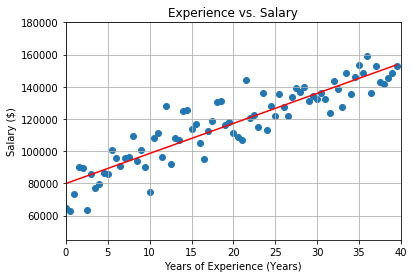

In [6]:
#plot the prediction line

plt.title("Experience vs. Salary")
plt.xlabel('Years of Experience (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.xlim(0,40)
plt.ylim(45000,180000)
plt.scatter(years, salary)


####################################################
####Type your code here to see the ################# 
####prediction line in the diagram (one line) ######
m, b = np.polyfit(years, salary, 1)
plt.plot(years, m*years + b, color="red")
####################################################
####################################################
 
plt.show()